# Electric Motor Temperature Estimation

**Link**

https://www.kaggle.com/wkirgsn/electric-motor-temperature


**Context**

The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a german OEM's prototype model. Test bench measurements were collected by the LEA department at Paderborn University. This data set is mildly anonymized.

**Content**

All recordings are sampled at 2 Hz. The data set consists of multiple measurement sessions, which can be distinguished from each other by column `profile_id`. A measurement session can be between one and six hours long.

The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque. Currents in d/q-coordinates (columns `i_d` and `i_q`) and voltages in d/q-coordinates (columns `u_d` and `u_q`) are a result of a standard control strategy trying to follow the reference speed and torque. Columns `motor_speed` and `torque` are the resulting quantities achieved by that strategy, derived from set currents and voltages.

Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.

The dataset contains following attributes:
- u_q - Voltage q-component measurement in dq-coordinates (in V)
- coolant - Coolant temperature (in °C)
- stator_winding - Stator winding temperature (in °C) measured with thermocouples
- u_d - Voltage d-component measurement in dq-coordinates
- stator_tooth - Stator tooth temperature (in °C) measured with thermocouples
- motor_speed - Motor speed (in rpm)
- i_d - Current d-component measurement in dq-coordinates
- i_q - Current q-component measurement in dq-coordinates
- pm - Permanent magnet temperature (in °C) measured with thermocouples 
- stator_yoke - Stator yoke temperature (in °C) measured with thermocouples
- ambient - Ambient temperature (in °C)
- torque - Motor torque (in Nm)
- profile_id - Measurement session id. Each distinct measurement session can be identified through this integer id.

The `pm` attribute is our target variable, which should be predicted depending on new measurements.

**Task (Regression)**

Your task is to use the present data set to predict the temperature of the motors permament magnet. To do this, use the `Decision Tree` and `ANN` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

* **Frame the Problem and Look at the Big Picture:**

    1. **Define the objective of your project in your own words.** <br>
    <br>In this project, an ML algorithm is to be developed based on a data set. The data set contains different sensor data from a permanent magnet synchronous motor, which is mounted on a test bench. Sensor data recorded includes temperatures in the area of the permanent magnet and the stator, torque and speed. The main focus of the task is on the prognosis of the permanent magnet temperature of the motor, where three different regression algorithms should be used. Fur easier readability, the abbreviation "pm" will be used for the term "permanent motor temperature".<br><br>
    2. **Select a performance criteria for evaluation of the task.** <br>
    <br>A typical criterion for evaluating performance for regression tasks is the root mean square error (RMSE). Here, a statement can be made about how many errors the algorithm makes during the prediction, whereby larger errors are weighed more heavily. Alternatively, the mean absoulte error (MAE) can be used. By using the mean squared error (MSE) additionally, we have an indicator for the magnitude of the error. A very simple criterion is also the coefficient and determination R2, which when being close to 1 indicates good results. However, we believe that just using a single criterion is not enough to match this precise prediction task and therefore plan on using all four criteria (listed below) for evaluating our task.<br><br>
    - Root Mean Square Error (RMSE)<br>
    - Mean Squared Error (MSE)<br>
    - Mean Absolute Error (MAE)<br>
    - Coefficient of determination (R2)<br>
    3. **Explain in a paragraph how you would solve the problem manually.** <br>
    <br>Instead of an ML algorithm for predicting the heat development of the magnet, a detailed simulation model can be used as an alternative. Thermal analysis can be carried out on the model to investigate the heat sources and, by varying the simulation parameters, statements can be made about the characteristics of the heat development. In concrete terms, the motor-CAD software "suite" with the "Therm" design module is particularly suitable for this purpose, as it can be used to analyze the thermal behavior of the system (for example, the magnet temperature under various boundary conditions).<br><br>
    4. **List assumptions that you made so far.**<br>
    <br>The task requires concrete predictions about the temperature of the permanent magnet. Since the alogrithm is supposed to predict a continuous quantity and not a class designation, the processing as a regression task is to be assumed as correct. We definitely do not except a linear regression, as the task and the correlations between currents, voltage, torque and temperatures within an electric motor seem much more complex. Also, the data is fixed, unlike for an online-learning ML project.<br>

* **Get the Data:**
    1. **Create a new workspace for the course project.**
    2. **Discuss with your colleagues whether you would like to use a version management tool.**
        - git: https://git-scm.com/
        - github: https://github.com/
        - github tutorial: https://guides.github.com/activities/hello-world/
        <br><br>We decided to work with github and created a respective workspace for this project.

* **Get the Data:**
    3. **Get the data.**<br>
    <br>In the code below, we are importing several important packages such as pandas in order to use machine learning techniques. Later we load the data from the excel-file ("measures_v2.csv"), as found on kaggle.com for this task. We create the name "db" for the copy of the loaded database.<br><br> For easier readibility of the following code in this project, we import all necessary ML methods in the beginning. Of course we used more than just these three methods, but since we only kept the ones listed below in the final version of this project, we only import these.<br><br>
    4. **Convert the data to a format you can easily manipulate (if required).**
    5. **Check the size and type of the data.**<br>
    <br> The info() function lets us understand our dataset: we have 1.33 million entries, and except for the profile-id of the measurements, which is stored as integers, we have the float data type.

In [3]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

#importing ML methods
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# loading the data
database = pd.read_csv('measures_v2.csv',sep = ',')

# a copy is created
db = database.copy()

In [4]:
# size and type of data
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


* **Get the Data:**
    6. **Sample a test set, put it aside, and never look at it (no data snooping!).**<br>
    <br>We are creating a test set, consisting of 10% of the original dataset. This is enough since we have a dataset of over one million entries. We use the train_test_split in order to create a test split that is reproducable upon every run of the program. We use the random_state of 11 and receive a test set of 133 thousand entries and the rest of the data, nearly 1.2 million entries, get stored in the rest_set.<br>
    <br>Making sure we got an actual, randomized (but reproducable) test_ and rest_set by using the head() function.

In [5]:
# Creation of the Testset
from sklearn.model_selection import train_test_split

rest_set, test_set = train_test_split(db, test_size=0.1, random_state=11)

print("Lenght of rest set: " + str(len(rest_set)))
print("Lenght of test set: " + str(len(test_set)))

Lenght of rest set: 1197734
Lenght of test set: 133082


In [6]:
test_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
722369,130.618692,29.050824,61.439510,0.002221,52.941690,3553.990284,-46.615213,-1.604462,59.373981,43.563195,26.384410,-2.169952,53
1280896,68.190920,49.863316,78.749380,-112.427244,68.909741,2567.191703,-108.862588,136.358895,66.631247,59.875995,27.177060,116.708366,58
668531,17.199327,40.748283,97.473761,-129.257835,75.236424,4999.961953,-205.664365,76.189573,73.635881,57.333054,23.154760,75.000000,41
2358,87.597618,19.468315,71.651123,-96.182190,56.600018,4999.952148,-138.393463,53.406368,63.024918,39.537643,23.174236,48.502354,17
1242057,22.233465,87.194638,122.463910,-128.911239,104.791174,4264.252190,-195.114427,90.687950,90.172948,95.318739,26.383176,90.518617,79


In [7]:
rest_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
400298,8.151685,18.437384,64.011566,-7.612288,45.986176,99.964218,-79.939240,188.412292,37.691719,37.013691,22.591074,155.077316,18
325340,46.205223,18.772440,28.150265,-15.377940,26.573431,951.265442,-7.817497,43.902065,46.255211,24.324396,23.070459,31.138876,10
672550,89.541055,65.494090,76.174519,-49.249027,72.121730,1999.986862,-15.493590,70.795438,72.817454,69.450865,24.797813,50.000000,41
223357,72.446983,18.838314,72.819138,-106.641556,55.778599,5749.950195,-163.337921,51.757366,52.356743,38.467037,21.689573,48.752762,27
844675,46.651256,47.872370,78.712905,8.423395,68.903914,1046.608792,-5.822269,-9.225458,68.175833,58.731806,26.213013,-7.832992,70


* **Get the Data:**
    7. **Sample a training set and a validation set.**<br>
    <br>The same steps with the same logic are being used for creating a training as well as a validation set, consisting only of the rest_set. This is done so we do not participate in data snooping, so the test_set remains untouched for later. Here, 10% as a factor for creating the validation set also seems enough for creating and we get about 120 thousand entries for the validation set and a little less than 1.1 million entries for the training set.<br>
    <br>Once again making sure we got an actual, randomized (but reproducable) train_ and val_set by using the head() function.<br>

In [6]:
# Creation of Sample and training set
from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(rest_set, test_size=0.1, random_state=22)

print("Lenght of train set: " + str(len(train_set)))
print("Lenght of val set: " + str(len(val_set)))

Lenght of train set: 1077960
Lenght of val set: 119774


In [7]:
train_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
268946,131.798004,18.662558,32.868351,-3.034433,32.434135,3499.968506,-46.142372,1.170881,42.330231,27.604677,23.233196,-5.506984e-01,26
176821,7.660975,18.284367,38.949753,-5.408100,31.342405,99.980026,-43.511356,132.618301,28.794954,26.382999,22.200279,1.035654e+02,3
364006,12.091551,18.609158,19.720566,0.825880,19.081577,249.982758,-1.999879,1.098467,24.170731,18.982836,22.872232,1.068078e-01,13
1191570,24.076398,27.091372,56.994167,-9.424970,49.657317,485.428316,-9.601425,48.490075,61.517311,41.958759,26.103196,3.353550e+01,67
1107597,0.673186,18.942768,21.463182,-0.432901,19.850620,-0.001626,-2.001062,1.097172,42.184887,19.848892,23.302057,3.705492e-320,43


In [8]:
val_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
404741,8.142149,18.448454,63.974323,-7.616867,45.986176,100.007439,-79.940041,188.412231,38.216949,37.032902,23.182297,1.550821e+02,18
169756,7.675543,19.032387,35.922367,-5.385024,28.112301,100.018112,-43.511829,132.617859,25.428232,24.806215,21.661230,1.035793e+02,3
1132486,122.701561,36.414264,63.689708,-27.061372,59.716856,2616.060259,-4.566916,27.932470,66.742526,52.571328,26.040872,1.859646e+01,66
1146078,0.484796,69.301419,68.881660,-0.548846,67.283227,-0.000602,-1.999267,1.098893,76.843503,67.144779,26.384509,-9.562902e-277,66
376994,119.398819,18.974096,63.866467,-51.839420,52.750652,5649.946289,-119.129120,22.683634,64.781738,38.750271,22.451925,1.997573e+01,31


* **Explore the Data:**
    1. **Create a copy of the training set for exploration (sample it down to a manageable size if necessary).**<br>
    2. **(Create a Jupyter Notebook for your data exploration.)**<br>
    3. **Study each attribute and its characteristics**<br>
        - name
        - type
        - % of missing values
        - noisiness
        - usefulness for task
        - type of distribution
        - ...

In this section we start looking at the training set for further analysis, as to later understand what regression methods or what model to use for the prediction of the permanent magnet temperature. In order to to so, we will analyze the data set by focussing on the training set. We can see the first 10 entries of the train_set by using the head(10) function. We can also see that the order is randomized (shuffled), which is caused by the train_test_split.<br><br> The measured data was collected over a certain amount of time for each measurement (profile_id). However, we do not want to be bound to the time gaps in between different measurements. Therefore, having a randomized order (that is not bound to a specific time) seems to be an advantage for this ML project.<br><br>
By using the describe() function we see the distribution as well as other statistical information of values in each category of our database.<br><br> (Mean, min max value interessant)
The information we receive here (**bitte hinzufügen; dafür s. Paper Eike, Table 1 und Fig. 8 ff**) is also used for the analysis of siginficant parameters for the training of the models (see further below).

In [9]:
# show examples
train_set.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
268946,131.798004,18.662558,32.868351,-3.034433,32.434135,3499.968506,-46.142372,1.170881,42.330231,27.604677,23.233196,-5.506984e-01,26
176821,7.660975,18.284367,38.949753,-5.408100,31.342405,99.980026,-43.511356,132.618301,28.794954,26.382999,22.200279,1.035654e+02,3
364006,12.091551,18.609158,19.720566,0.825880,19.081577,249.982758,-1.999879,1.098467,24.170731,18.982836,22.872232,1.068078e-01,13
1191570,24.076398,27.091372,56.994167,-9.424970,49.657317,485.428316,-9.601425,48.490075,61.517311,41.958759,26.103196,3.353550e+01,67
1107597,0.673186,18.942768,21.463182,-0.432901,19.850620,-0.001626,-2.001062,1.097172,42.184887,19.848892,23.302057,3.705492e-320,43
1299237,124.128924,56.105484,68.091274,43.775792,65.554770,3262.391801,-38.406246,-39.381371,62.757311,61.222820,28.868314,-3.132680e+01,58
1082114,63.893838,54.117795,92.491823,115.225639,82.630779,2544.456566,-94.246472,-150.263809,83.954870,71.433117,27.975262,-1.262093e+02,65
1110441,62.070888,50.046678,80.485228,-113.937786,69.132450,3660.689993,-147.133380,93.735490,61.991074,59.328886,25.415930,8.590038e+01,66
356603,12.189024,18.617973,19.850620,0.899110,19.841887,249.999359,-2.000922,1.094885,29.201654,19.585794,23.170063,1.860641e-01,13
738403,22.923956,39.646821,78.701284,-128.818025,64.213125,3972.297116,-201.933776,98.820492,64.809229,52.828732,26.718707,1.002653e+02,53


In [10]:
train_set.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06
mean,5.427713e+01,3.623605e+01,6.634329e+01,-2.508142e+01,5.688089e+01,2.202129e+03,-6.869266e+01,3.735219e+01,5.851277e+01,4.819087e+01,2.456516e+01,3.105592e+01,4.079769e+01
std,4.416757e+01,2.179415e+01,2.866754e+01,6.309623e+01,2.295087e+01,1.860189e+03,6.491413e+01,9.216714e+01,1.899792e+01,1.999304e+01,1.929297e+00,7.711733e+01,2.504925e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.087856e+01,1.810874e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206990e+01,1.869850e+01,4.278924e+01,-7.844882e+01,3.841339e+01,3.153261e+02,-1.153646e+02,1.095855e+00,4.316939e+01,3.199424e+01,2.318492e+01,-1.404855e-01,1.700000e+01
50%,4.894140e+01,2.690158e+01,6.511998e+01,-7.301491e+00,5.602904e+01,1.999977e+03,-5.109428e+01,1.577397e+01,6.028080e+01,4.562482e+01,2.479733e+01,1.085479e+01,4.300000e+01
75%,9.000708e+01,4.985702e+01,8.813571e+01,1.471579e+00,7.559657e+01,3.764931e+03,-2.979675e+00,1.005344e+02,7.200846e+01,6.147104e+01,2.621690e+01,9.135339e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.135906e+02,1.011023e+02,3.069054e+01,2.609997e+02,8.100000e+01


* **Explore the Data:**
    5. **Visualize the data.**<br>
<br>The distribution of values within the respective categories is shown better with histograms. Here we got the histograms for the training set. We are using histograms of all categories in order to recognize possible transformations. In the histogram of the ambient temperature we see that the data swaps over towards the left, which might indicate certain outliers in that value range.<br><br>
However, this does not help us much at first glance, as the distribution of similarly seeming categories like the temperatures of the stator winding, yoke or tooth differ from one another.<br>

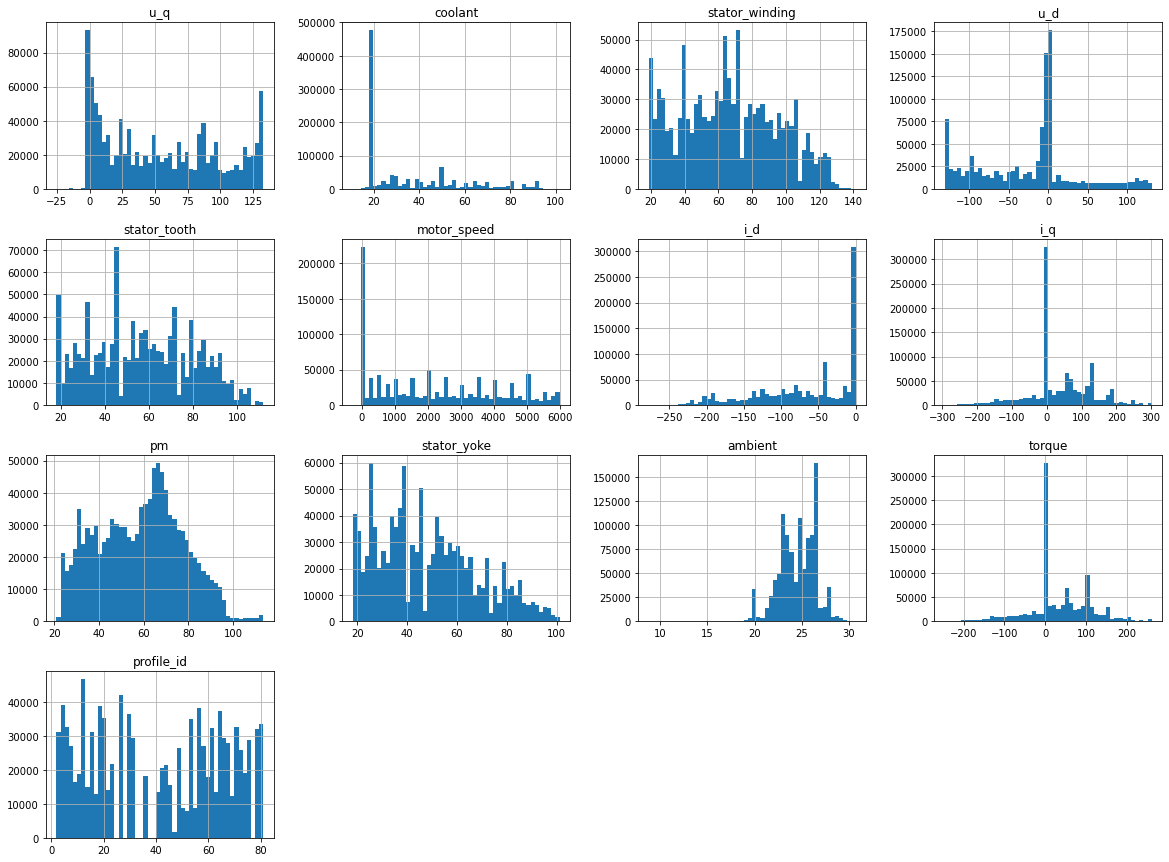

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

train_set.hist(bins=50, figsize=(20,15))
plt.show()

* **Explore the Data:**
    6. **Study correlations between attributes.**<br>
<br>The correlation matrix however does show linear correlations above 0,9 for the stator winding and yoke as well as stator tooth. Besides there is an exact correlation of 1 for the electric current i_q and torque. Down below, we list the correlation values of each category compared to the aim category of the permanent magent temperature ("pm"), as numerical values. We can a partially strong correlation of pm and the temperatures of the three stator elements (tooth, yoke, winding).<br><br>
Allgemein zeigt die Korrelation, dass keine doppelten Informationen im Datensatz in Bezug zur Zielgröße pm vorhanden sind. Die Attribute iq und torque korrelieren mit 1 zueinander, sowie stator_tooth und stator_winding. Diese Informationen können ggfs. aus dem Datensatz entnommen werden. Vorversuche zeigten jedoch das sich dadurch unsere Perfomance Indikatoren verschlechtert haben. Die Attribute iq und torque werden im Datensatz behalten, da diese eine hohe Korrelation in Bezug zu pm haben. Daher werden die Attribute in der finalen Version nicht aus dem Datensatz entfernt. Bei Betrachtung der Korrelationen zur Zielgröße ist zu sehen, dass einige Attribute eine sehr schwache Korrelation zu pm besitzen. <br><br>

<AxesSubplot:>

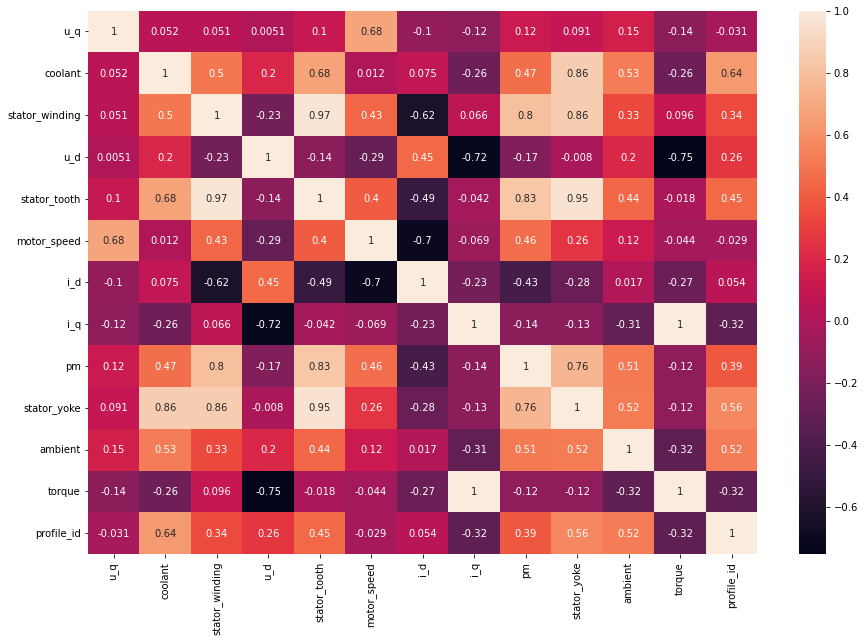

In [8]:
# Correlation on training set or the whole database

corr = train_set.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)


In [9]:
# Correaltion to pm

train_set_corr=train_set.corr()
train_set_corr['pm'].sort_values()

i_d              -0.427484
u_d              -0.171882
i_q              -0.142775
torque           -0.117510
u_q               0.122636
profile_id        0.386173
motor_speed       0.459041
coolant           0.466909
ambient           0.513131
stator_yoke       0.756415
stator_winding    0.795748
stator_tooth      0.831905
pm                1.000000
Name: pm, dtype: float64

* **Explore the Data:**
    5. **Visualize the data.**
    6. **Study correlations between attributes.**<br>
<br>Hoping to find out more about the distribution and ranges of each category, a scatter matrix is created for each category. We do this by importing the scatter_matrix method from the pandas.plotting package. We arrange it in 3 columns to 4 rows for better visibility (the 16,20 figsize also have a positive effect on the visibility and those values were found by experimenting). Once again, the data we look at is from the training set (train_set), as we do not want data snooping with the test set. <br><br> All scatter matrix plots are for each respective category in comparison to pm (permanent magnet temperature). <br> The values for ax=axes just place each category either on the left, middle or right of a certain column/row in the output line.<br><br>

Ausreisser im Attribut Ambient erkennbar

NameError: name 'train_set' is not defined

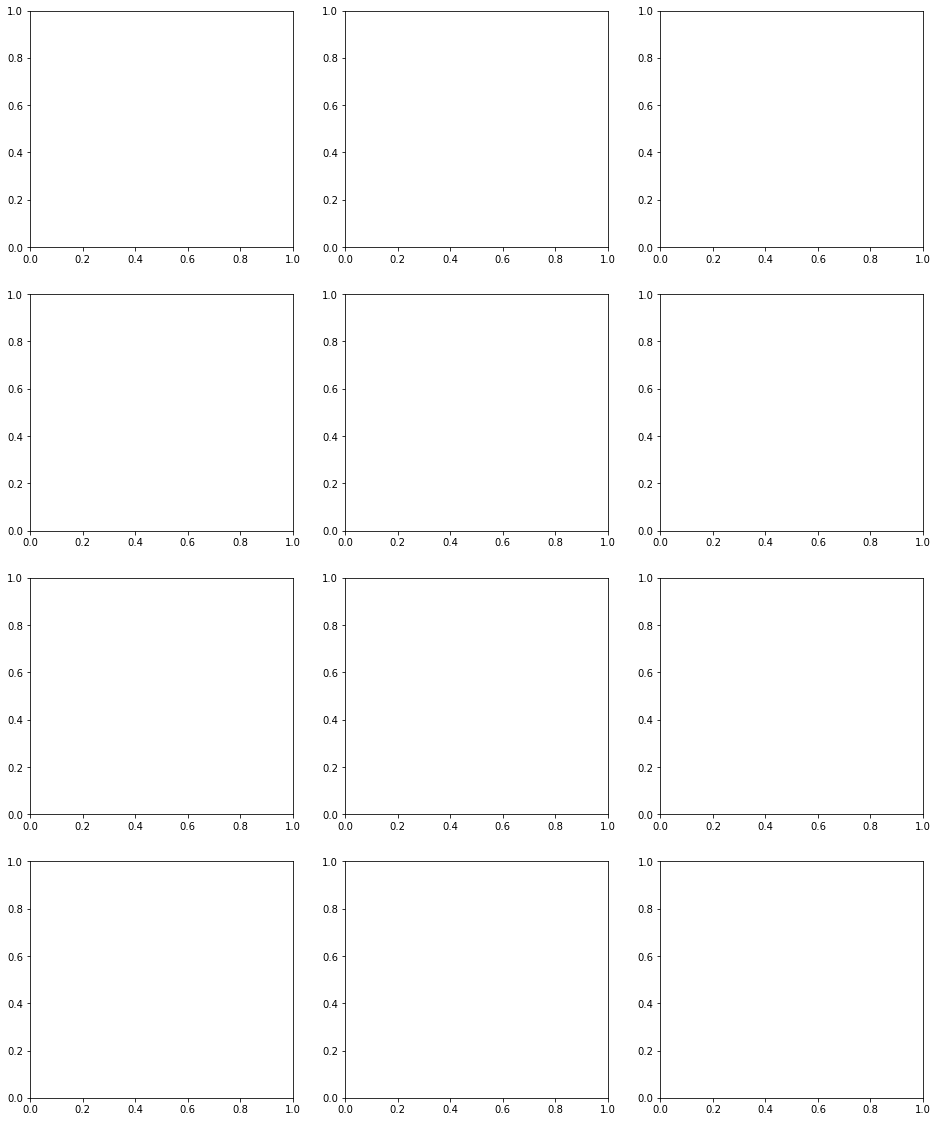

In [5]:
#scatter_matrix for attributes and pm
from pandas.plotting import scatter_matrix

figure,axes = plt.subplots(nrows=4,ncols=3,figsize=(16,20))
sns.scatterplot(data=train_set,x = 'u_q', y = 'pm',ax=axes[0,0])
sns.scatterplot(data=train_set,x = 'coolant', y = 'pm',ax=axes[0,1])
sns.scatterplot(data=train_set,x = 'stator_winding', y = 'pm',ax=axes[0,2])
sns.scatterplot(data=train_set,x = 'u_d', y = 'pm',ax=axes[1,0])
sns.scatterplot(data=train_set,x = 'stator_tooth', y = 'pm',ax=axes[1,1])
sns.scatterplot(data=train_set,x = 'motor_speed', y = 'pm',ax=axes[1,2])
sns.scatterplot(data=train_set,x = 'i_d', y = 'pm',ax=axes[2,0])
sns.scatterplot(data=train_set,x = 'i_q', y = 'pm',ax=axes[2,1])
sns.scatterplot(data=train_set,x = 'stator_yoke', y = 'pm',ax=axes[2,2])
sns.scatterplot(data=train_set,x = 'ambient', y = 'pm',ax=axes[3,0])
sns.scatterplot(data=train_set,x = 'torque', y = 'pm',ax=axes[3,1])


* **Explore the Data:**
    7. **Identify the promising transformations you may want to apply.**
    8. **Document the results of your exploratory data analysis.**<br>
<br>Transformation - no transformation performed
- Die Attribute untereinander müssen nicht verrechnet werden (mit Kombination von Attributen lassen sich keine weiteren Informationen ermitteln)
- keine signifikanten Verteilungsmuster ersichtlich, die einer Transformation bedürfen

* **Prepare the Data:**
    1. **Write functions for all data transformations you apply.**<br>
<br> Data transformations are not applied, since the data is already in a matching data type (float). The profile_id is stored as integers, but seems to be unnessecary for the pm prediction and therefore does not require any transformations or so.<br><br>
In order to find possible missing values, the isnull() function as a sum of all categories is used for the train_set. Alternatively, we can also use the isnull() function with a true or false outcome. The function was also carried out for the val_set, but got removed because it has no direct value for the outcome of this task. We can see that there is no data missing. <br><br>

In [31]:
#finding null values in the dataset by using the isnull() function
print(train_set.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In order to find possible outliers, boxplots of all the categories are created. For that we create another subplot of 4x3 (rows x columns) and position each category within a place on the left, middle or right within that plot. The category "profile_id" is not inspected here since the data there is merely a measurement number for documentation purposes. Once again we only focus on the train_set. <br><br> We can already notice some outliers for the coolant and ambient temperatures as well as for the voltage values of u_d or the current values for i_q and torque. However, upon further inspecting the specific value ranges, we come to the conclusion that these values seem to be realistic and within a range of possible measurements. Therefore, no values will be removed for the further analysis. <br><br>

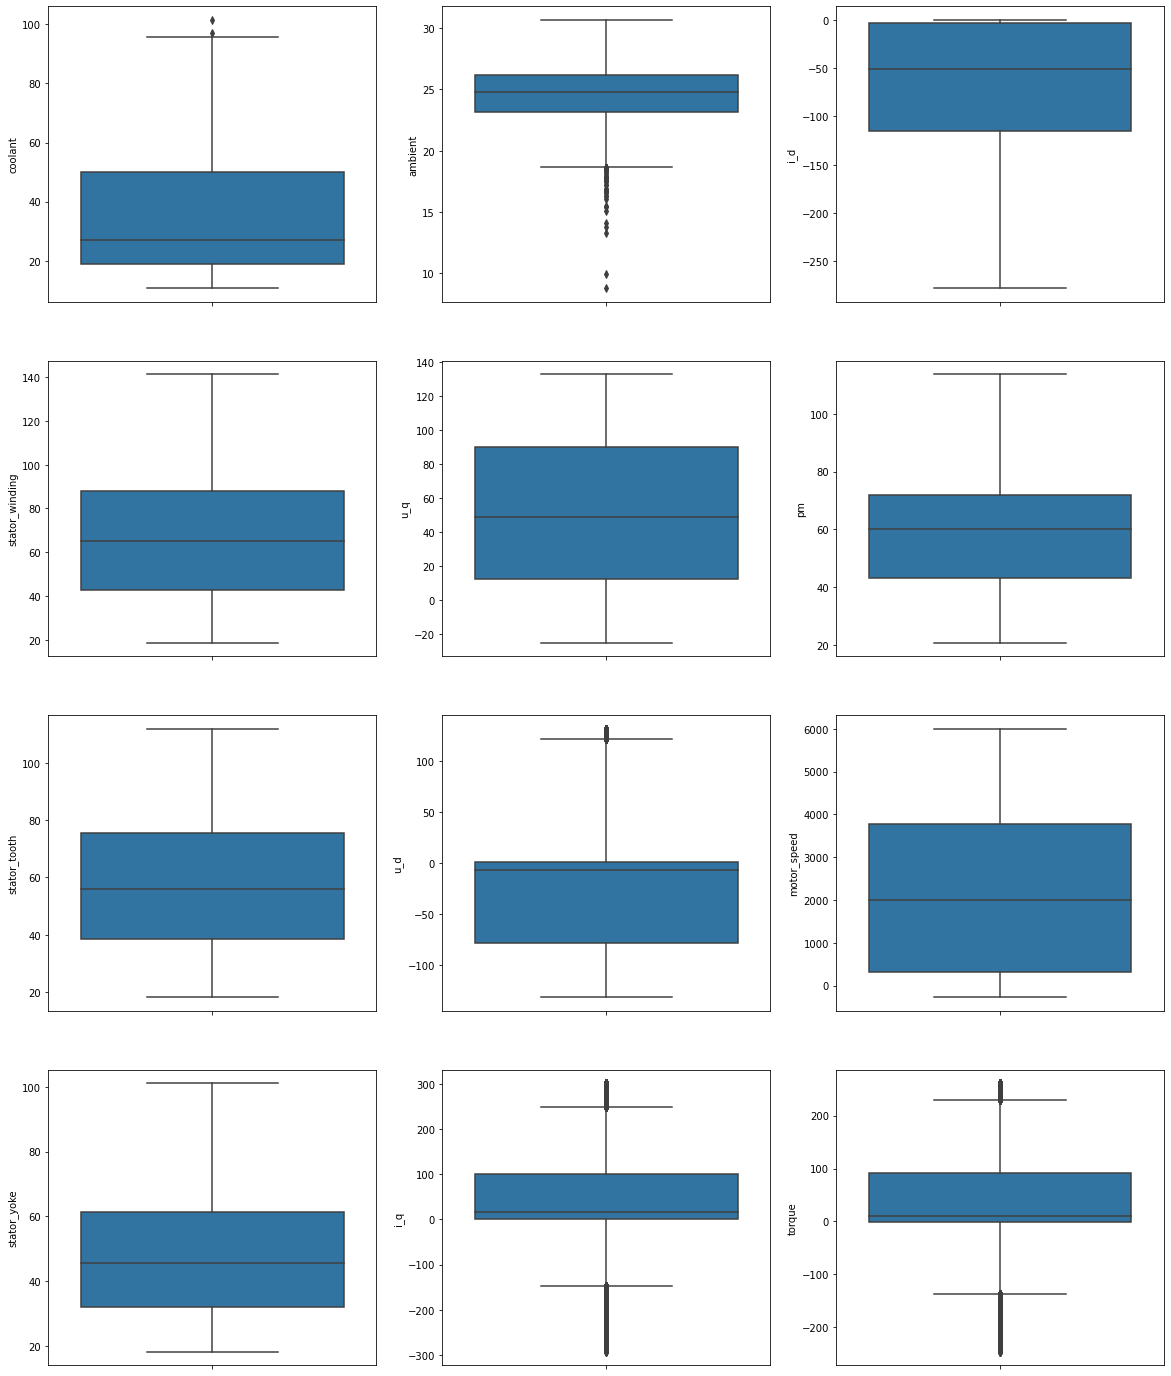

In [38]:
fig, axs = plt.subplots(4, 3, figsize = (20,25))
sns.boxplot(y = 'coolant', data = train_set, ax = axs[0,0]);
sns.boxplot(y = 'stator_winding', data = train_set, ax = axs[1,0]);
sns.boxplot(y = 'stator_tooth', data = train_set, ax = axs[2,0]);
sns.boxplot(y = 'stator_yoke', data = train_set, ax = axs[3,0]);
sns.boxplot(y = 'ambient', data = train_set, ax = axs[0,1]);
sns.boxplot(y = 'u_q', data = train_set, ax = axs[1,1]);
sns.boxplot(y = 'u_d', data = train_set, ax = axs[2,1]);
sns.boxplot(y = 'i_q', data = train_set, ax = axs[3,1]);
sns.boxplot(y = 'i_d', data = train_set, ax = axs[0,2]);
sns.boxplot(y = 'pm', data = train_set, ax = axs[1,2]);
sns.boxplot(y = 'motor_speed', data = train_set, ax = axs[2,2]);
sns.boxplot(y = 'torque', data = train_set, ax = axs[3,2]);

* **Prepare the Data:**
    3. Select important features (drop attributes that provide no useful information for the task).<br>
    Wie bereits oben beschrieben behalten wir alle Attribute bis auf die Profile ID
    4. Use feature engineering.
    Unser Datensatz ebthält keine Kategorischen Werte und haben keine Transformationen vorgenommen
        - decompose categorical features                
        - add promising transformations for features<br>
        - aggregate features into promissing new features
    5. Use feature scaling (standardize or normalize features).<br>
    <br> Because of the few outliers we have and did not remove (by choice) we used the standard scaler. Ausformulieren (Warum benutzen wir den STandard Scaler)<br><br>
    
Die Zielgröße wird aus dem Trainingsdatensatz herausgezogen und im restlichen Datensatz zusammen mit der Profile ID entfernt.
Der Datensatz wird mit der Funktion FitTransform skaliert. Fit Transform legt in diesem Schritt die Einstellung für das Scaling aller anderen Datensätze fest (Validierung + Test). Für diese wird die transform Funktion genutzt.

In [13]:
from sklearn.preprocessing import StandardScaler  

train_set_y = train_set['pm'].copy()
train_set_x = train_set.drop(['profile_id','pm'], axis=1)
scaler = StandardScaler()
train_set_x_scaled = pd.DataFrame(scaler.fit_transform(train_set_x), columns=train_set_x.columns)
train_set_x_scaled.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,1.755155,-0.806340,-1.167695,0.349419,-1.065178,0.697692,0.347387,-0.392562,-1.029669,-0.690387,-0.409851
1,-1.055439,-0.823693,-0.955560,0.311799,-1.112746,-1.130073,0.387917,1.033624,-1.090774,-1.225773,0.940249
2,-0.955126,-0.808790,-1.626325,0.410600,-1.646967,-1.049435,1.027400,-0.393348,-1.460911,-0.877483,-0.401325
3,-0.683777,-0.419593,-0.326122,0.248136,-0.314741,-0.922864,0.910299,0.120844,-0.311714,0.797201,0.032153
4,-1.213650,-0.793483,-1.565538,0.390650,-1.613459,-1.183822,1.027382,-0.393362,-1.417593,-0.654695,-0.402710


Function for Scaling

In [14]:
def scaling(self):
    Y = self['pm'].copy()
    X = self.drop(['profile_id','pm'], axis=1)
    X = pd.DataFrame(scaler.transform(X), columns=X.columns)
    return X, Y

Skalierung des Validierungsdatensatzes

In [25]:
val_set_x_scaled,val_set_y = scaling(val_set)
val_set_x_scaled.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,-1.044545,-0.816164,-0.082636,0.276793,-0.474697,-1.130059,-0.173266,1.638980,-0.558093,-0.716770,1.608280
1,-1.055109,-0.789371,-1.061163,0.312165,-1.253486,-1.130053,0.387910,1.033619,-1.169640,-1.505174,0.940430
2,1.549201,0.008177,-0.092564,-0.031380,0.123567,0.222521,0.987855,-0.102203,0.219099,0.764897,-0.161565
3,-1.217915,1.517168,0.088545,0.388812,0.453244,-1.183821,1.027410,-0.393343,0.948026,0.943013,-0.402710
4,1.474424,-0.792045,-0.086398,-0.424083,-0.179960,1.853478,-0.776972,-0.159152,-0.472195,-1.095338,-0.143680


* **Select and Train your Models:**
    1. Learn the basics about the models you've been assigned.
    2. Select a 3rd model on your own. Use criteria for your selection.
    3. Make a plan for training and evaluation of the models.
    4. Build your models (select meaningful values for the model parameters).
    5. Train your models with the training set.
    6. Measure and compare the performance of your models (use N-fold cross-validation).
    7. Analyze the most significant parameters for each model.
    8. Analyze the types of errors the models make.

Verwendete Modelle (Punkte 1-3)<br>
1 Basics<br>
2 Begründung 3. Modell <br>
3 Plan for Training and Evaluation
- Training wird nur mit dem gesamten Trainingsdatensatz durchgeführt und mit dem Validationsdatensatz validiert
- Die Evaluation erfolgt mittels der zuvor definierten Performance Indikatoren (MSE, RMSE, MAE, R2)

In [133]:
def performance_p(true, pred, nr):
    mse = mean_squared_error(true, pred)
    print("MSE Model "+str(nr)+": "+str(mse))
    rmse = np.sqrt(mse)
    print("RMSE Model "+str(nr)+": "+str(rmse))
    mae = mean_absolute_error(true, pred)
    print("MAE Model "+str(nr)+": "+str(mae))
    r2 = r2_score(true, pred)
    print("R2 Model "+str(nr)+": "+str(r2)) 

In [134]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model_one = DecisionTreeRegressor(random_state=1)
model_one.fit(train_set_x_scaled, train_set_y)
model_one_y = model_one.predict(train_set_x_scaled)
performance_p(train_set_y, model_one_y, 1)

MSE Model 1: 2.789547706147171e-17
RMSE Model 1: 5.2816168984006885e-09
MAE Model 1: 3.756476263549103e-11
R2 Model 1: 1.0
MSE Model 1: 2.789547706147171e-17
RMSE Model 1: 5.2816168984006885e-09
MAE Model 1: 3.756476263549103e-11
R2 Model 1: 1.0


In [29]:
# ANN
from sklearn.neural_network import MLPRegressor

# n_job = -1 using maximal computing performance
model_two = MLPRegressor(random_state=1,hidden_layer_sizes=(10,),max_iter=2000, n_jobs = -1)
model_two.fit(train_set_x_scaled, train_set_y)
model_two_y = model_two.predict(train_set_x_scaled)
performance_p(train_set_y, model_two_y, 2)

MSE Model 2: 43.22726431497823
RMSE Model 2: 6.5747444296320925
MAE Model 2: 4.870558222405307
R2 Model 2: 0.880321180793456

Kriterien drittes Modell:
- kein Overfitting
- non-linear Regression
- robust

Auswahl: 

In [122]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

model_three = KNeighborsRegressor()
model_three.fit(train_set_x_scaled, train_set_y)
model_three_y = model_three.predict(train_set_x_scaled)
performance_p(train_set_y, model_three_y, 3)

MSE Model 3: 0.6648031782642182
RMSE Model 3: 0.8153546334351809
MAE Model 3: 0.22435885804358024
R2 Model 3: 0.9981580340961865


Most significant parameters<br>
ambient           0.513131<br>
stator_yoke       0.756415<br>
stator_winding    0.795748<br>
stator_tooth      0.831905|


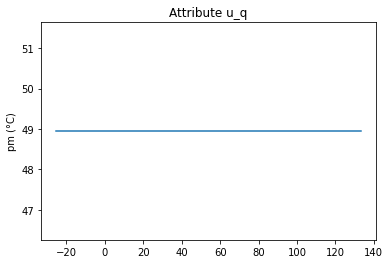

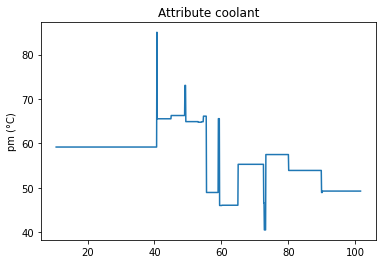

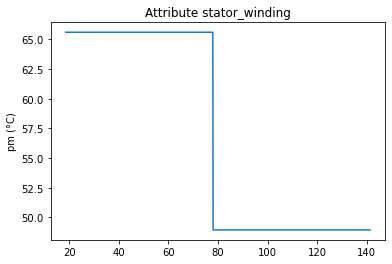

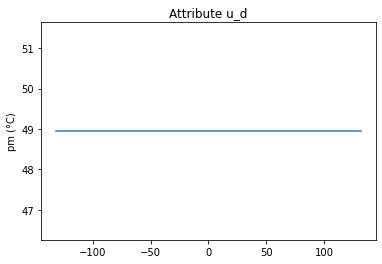

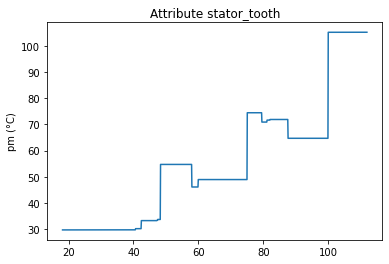

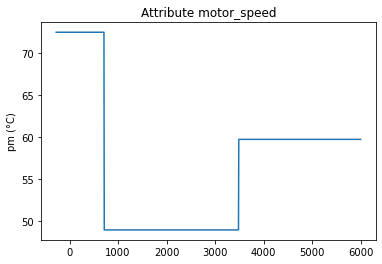

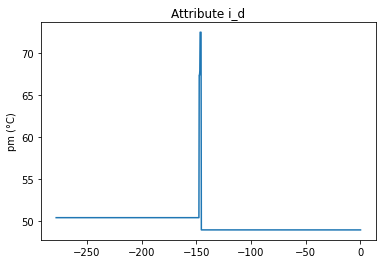

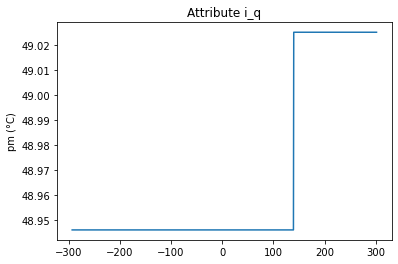

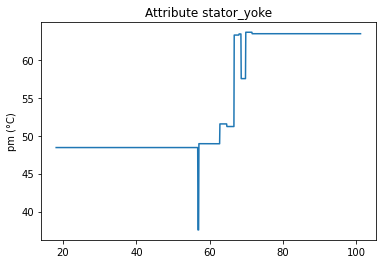

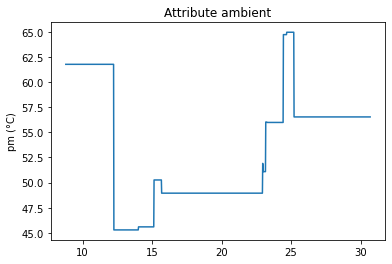

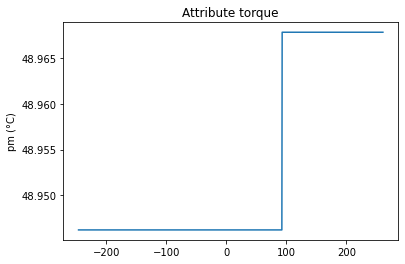

In [120]:
"""
def attribute(self):
    self_max = train_set_x_scaled[self].max()
    self_min = train_set_x_scaled[self].min()
    self_max_org = train_set_x[self].max()
    self_min_org = train_set_x[self].min()
    xAxis = np.linspace(self_min_org, self_max_org, num = 1001)
    columns = train_set_x_scaled.columns.values.tolist()
    index = range(0, 1001)
    df = pd.DataFrame(data = None, index = index, columns = columns)
    for i in columns:
        mean_val = train_set_x_scaled[i].mean()
        df[i] = mean_val
    attribute_range = np.linspace(self_min, self_max, num = 1001)
    df[self] = attribute_range
    return df, xAxis
"""
def attribute(self):
    self_max_org = train_set_x[self].max()
    self_min_org = train_set_x[self].min()
    xAxis = np.linspace(self_min_org, self_max_org, num = 1001)
    columns = train_set_x.columns.values.tolist()
    index = range(0, 1001)
    df = pd.DataFrame(data = None, index = index, columns = columns)
    for i in columns:
        mean_val = train_set_x[i].mean()
        df[i] = mean_val
    df[self] = xAxis
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df, xAxis

list_of_attributes = train_set_x_scaled.columns.values.tolist()

# Decisiontree
#figure,axes = plt.subplot(nrows=4,ncols=3,figsize=(16,20))
for i in list_of_attributes:
    plt.figure()
    df, xAxis = attribute(i)
    yAxis = model_one.predict(df)
    plt.plot(xAxis, yAxis)
    plt.title('Attribute {}'.format(i))
    plt.ylabel('pm (°C)')
plt.show()

In [ ]:
# ANN
for i in list_of_attributes:
    plt.figure()
    df, xAxis = attribute(i)
    yAxis = model_two.predict(df)
    plt.plot(xAxis, yAxis)
    plt.title('Attribute {}'.format(i))
    plt.ylabel('pm (°C)')
plt.show()

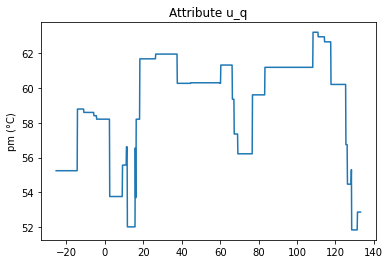

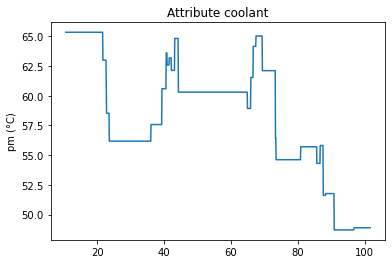

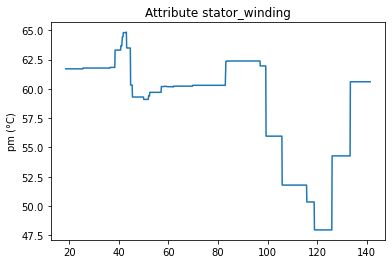

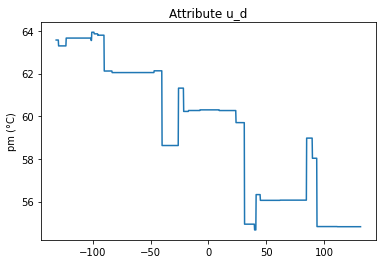

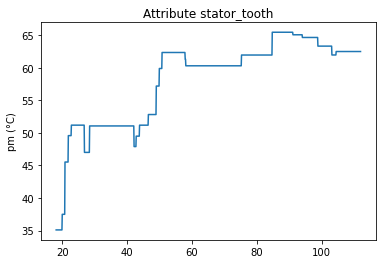

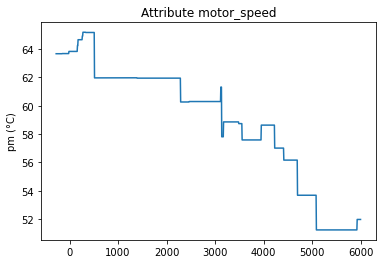

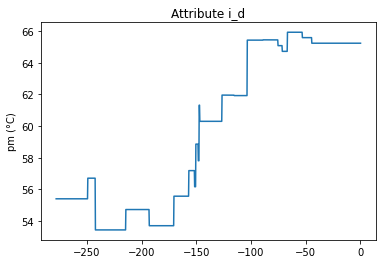

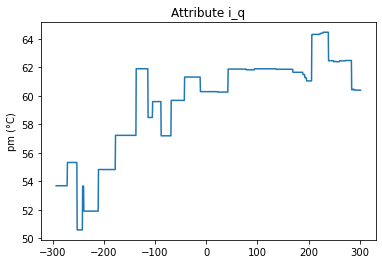

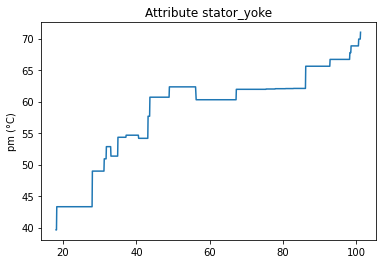

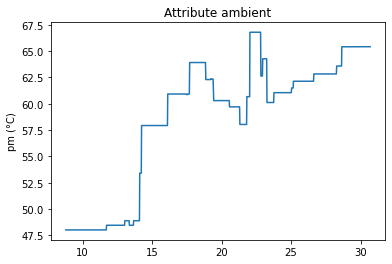

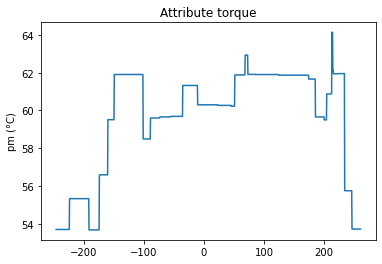

In [121]:
# KNeighborsRegressor
for i in list_of_attributes:
    plt.figure()
    df, xAxis = attribute(i)
    yAxis = model_three.predict(df)
    plt.plot(xAxis, yAxis)
    plt.title('Attribute {}'.format(i))
    plt.ylabel('pm (°C)')
plt.show()

In [126]:
# Decisiontree
model_one_val_y = model_one.predict(val_set_x_scaled)
performance_p(val_set_y, model_one_val_y, 1)

MSE Model 1: 0.6306331280096983
RMSE Model 1: 0.7941241263239005
MAE Model 1: 0.12476676590285411
R2 Model 1: 0.9982540318174478


In [ ]:
# ANN
model_two_val_y = model_two.predict(val_set_x_scaled)
performance_p(val_set_y, model_two_val_y, 2)

In [127]:
# KNeighborsRegressor
model_three_val_y = model_three.predict(val_set_x_scaled)
performance_p(val_set_y, model_three_val_y, 3)

MSE Model 3: 1.317515351420809
RMSE Model 3: 1.147830715489357
MAE Model 3: 0.3198349217741869
R2 Model 3: 0.996352332629805


* **Fine-Tune your Models:**
    1. Fine-tune the hyperparameters using cross-validation.
        - treat your data transformation choices as hyperparameters, especially when you are not sure about them. (e.g. if you are not sure whether to replace missing values with zeros or with the median value, or to just drop the rows.)
        - use grid search and random search $\to$ compare and evaluate the results.
    2. Compare the results of all three models after the fine-tuning process to determine the best hyperparameters.
    3. Select a final model and measure its performance on the test set to estimate the generalization error.
        - dont tweak your model after measuring the generalization error: you would just start overfitting the test set.
    4. Document the results of the examined models. Pay particular attention to the final model.

In [ ]:
# Gridsearch DecisionTree
from sklearn.model_selection import GridSearchCV

hparameters_model_one = {"max_depth": [2, 4, 8, 16, 32, 64, 128, 256, 512, None],
                         "min_samples_split": [2, 4],
                         "min_samples_leaf": [1, 2]
                        }

scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']

model_one_grid = DecisionTreeRegressor(random_state=1)

model_one_grid_search = GridSearchCV(model_one_grid,
                                     hparameters_model_one,
                                     scoring=scoring,
                                     n_jobs = -1,
                                     refit='r2')

model_one_grid_search.fit(train_set_x_scaled, train_set_y)

print("Best Parameter:", model_one_grid_search.best_params_)
print("Best Estimator:", model_one_grid_search.best_estimator_)
print("MSE:",model_one_grid_search.cv_results_['mean_test_neg_mean_squared_error'])
print("RMSE:",model_one_grid_search.cv_results_['mean_test_neg_root_mean_squared_error'])
print("MAE:",model_one_grid_search.cv_results_['mean_test_neg_mean_absolute_error'])
print("R2:",model_one_grid_search.cv_results_['mean_test_r2'])

In [ ]:
# Randomsearch DecisionTree
from sklearn.model_selection import RandomizedSearchCV

model_one_random = DecisionTreeRegressor(random_state=1)

model_one_random_search = RandomizedSearchCV(model_one_random,
                                             hparameters_model_one,
                                             n_iter = 20,
                                             scoring=scoring,
                                             n_jobs = -1,
                                             refit='r2',
                                             random_state = 1)

model_one_random_search.fit(train_set_x_scaled, train_set_y)

print("Best Parameter:", model_one_random_search.best_params_)
print("Best Estimator:", model_one_random_search.best_estimator_)
print("MSE:",model_one_random_search.cv_results_['mean_test_neg_mean_squared_error'])
print("RMSE:",model_one_random_search.cv_results_['mean_test_neg_root_mean_squared_error'])
print("MAE:",model_one_random_search.cv_results_['mean_test_neg_mean_absolute_error'])
print("R2:",model_one_random_search.cv_results_['mean_test_r2'])

In [ ]:
# Gridsearch ANN

# Timeconsuming - only one hyperparameter
hparameters_model_two = {"hidden_layer_sizes": [2, 4, 7, 10]}

scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']

model_two_grid = MLPRegressor(random_state=1,max_iter=2000)

model_two_grid_search = GridSearchCV(model_two_grid,
                                     hparameters_model_two,
                                     scoring=scoring,
                                     n_jobs = -1,
                                     refit='r2')

model_two_grid_search.fit(train_set_x_scaled, train_set_y)

print("Best Parameter:", model_two_grid_search.best_params_)
print("Best Estimator:", model_two_grid_search.best_estimator_)
print("MSE:",model_two_grid_search.cv_results_['mean_test_neg_mean_squared_error'])
print("RMSE:",model_two_grid_search.cv_results_['mean_test_neg_root_mean_squared_error'])
print("MAE:",model_two_grid_search.cv_results_['mean_test_neg_mean_absolute_error'])
print("R2:",model_two_grid_search.cv_results_['mean_test_r2'])

In [ ]:
# Randomsearch ANN

model_two_random = DecisionTreeRegressor(random_state=1)

model_two_random_search = RandomizedSearchCV(model_two_random, 
                                             hparameters_model_two,
                                             n_iter = 2,
                                             scoring=scoring,
                                             n_jobs = -1,
                                             refit='r2',
                                             random_state = 1)

model_two_random_search.fit(train_set_x_scaled, train_set_y)

print("Best Parameter:", model_two_random_search.best_params_)
print("Best Estimator:", model_two_random_search.best_estimator_)
print("MSE:",model_two_random_search.cv_results_['mean_test_neg_mean_squared_error'])
print("RMSE:",model_two_random_search.cv_results_['mean_test_neg_root_mean_squared_error'])
print("MAE:",model_two_random_search.cv_results_['mean_test_neg_mean_absolute_error'])
print("R2:",model_two_random_search.cv_results_['mean_test_r2'])

In [ ]:
# Gridsearch KNeighborsRegressor

hparameters_model_three = {"n_neighbors": [2, 4, 5, 6, 9],
                          "weights": ['uniform', 'distance']
                          }

scoring = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']

model_three_grid = KNeighborsRegressor()

model_three_grid_search = GridSearchCV(model_three_grid,
                                     hparameters_model_three,
                                     scoring=scoring,
                                     n_jobs = -1,
                                     refit='r2')

model_three_grid_search.fit(train_set_x_scaled, train_set_y)

print("Best Parameter:", model_three_grid_search.best_params_)
print("Best Estimator:", model_three_grid_search.best_estimator_)
print("MSE:",model_three_grid_search.cv_results_['mean_test_neg_mean_squared_error'])
print("RMSE:",model_three_grid_search.cv_results_['mean_test_neg_root_mean_squared_error'])
print("MAE:",model_three_grid_search.cv_results_['mean_test_neg_mean_absolute_error'])
print("R2:",model_three_grid_search.cv_results_['mean_test_r2'])

In [ ]:
# Randomsearch KNeighborsRegressor

model_three_random = KNeighborsRegressor()

model_three_random_search = RandomizedSearchCV(model_three_random, 
                                             hparameters_model_three,
                                             n_iter = 5,
                                             scoring=scoring,
                                             n_jobs = -1,
                                             refit='r2',
                                             random_state = 1)

model_three_random_search.fit(train_set_x_scaled, train_set_y)

print("Best Parameter:", model_three_random_search.best_params_)
print("Best Estimator:", model_three_random_search.best_estimator_)
print("MSE:",model_three_random_search.cv_results_['mean_test_neg_mean_squared_error'])
print("RMSE:",model_three_random_search.cv_results_['mean_test_neg_root_mean_squared_error'])
print("MAE:",model_three_random_search.cv_results_['mean_test_neg_mean_absolute_error'])
print("R2:",model_three_random_search.cv_results_['mean_test_r2'])

In [130]:
# Decisiontree Gridsearch result
model_one_grid = DecisionTreeRegressor(random_state=1, max_depth = 32, min_samples_leaf = 1, min_samples_split = 2)
model_one_grid.fit(train_set_x_scaled, train_set_y)

print("Performance Score Trainingsset")
model_one_grid_y = model_one_grid.predict(train_set_x_scaled)
performance_p(train_set_y, model_one_grid_y, 1)

print("\nPerformance Score Validationset")
model_one_grid_val_y = model_one_grid.predict(val_set_x_scaled)
performance_p(val_set_y, model_grid_val_y, 2)

Performance Score Trainingsset
MSE Model 1: 0.0021411625541935954
RMSE Model 1: 0.04627269771899619
MAE Model 1: 0.006454210503411143
R2 Model 1: 0.9999940674946386

Performance Score Validationset
MSE Model 1: 0.6758914047449628
RMSE Model 1: 0.8221261489242163
MAE Model 1: 0.12759088900127732
R2 Model 1: 0.9981287299459359


In [131]:
# Decisiontree Randomsearch result
model_one_random = DecisionTreeRegressor(random_state=1, max_depth = 512, min_samples_leaf = 1, min_samples_split = 2)
model_one_random.fit(train_set_x_scaled, train_set_y)

print("Performance Score Trainingsset")
model_one_random_y = model_one_random.predict(train_set_x_scaled)
performance_p(train_set_y, model_one_random_y, 1)

print("\nPerformance Score Validationset")
model_one_random_val_y = model_one_random.predict(val_set_x_scaled)
performance_p(val_set_y, model_one_random_val_y, 1)

Performance Score Trainingsset
MSE Model 1: 2.789547706147171e-17
RMSE Model 1: 5.2816168984006885e-09
MAE Model 1: 3.756476263549103e-11
R2 Model 1: 1.0

Performance Score Validationset
MSE Model 1: 0.6306331280096983
RMSE Model 1: 0.7941241263239005
MAE Model 1: 0.12476676590285411
R2 Model 1: 0.9982540318174478
